## Importing the Required Libraries

In [192]:
!pip install pyLDAvis

In [193]:
!wget https://raw.githubusercontent.com/snikhil17/Road_Safety/main/Data/road_accident_india_40k_tweets.csv

--2022-01-14 08:57:58--  https://raw.githubusercontent.com/snikhil17/Road_Safety/main/Data/road_accident_india_40k_tweets.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9251114 (8.8M) [text/plain]
Saving to: ‘road_accident_india_40k_tweets.csv.1’

road_accident_india 100%[===================>]   8.82M  --.-KB/s    in 0.09s   

2022-01-14 08:57:59 (99.7 MB/s) - ‘road_accident_india_40k_tweets.csv.1’ saved [9251114/9251114]



In [ ]:
#https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#1introduction
import numpy as np
import pandas as pd
import json
import glob

#Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

#spacy
import spacy
from nltk.corpus import stopwords

#vis
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import nltk
nltk.download('stopwords')

import gensim
from gensim.corpora import Dictionary

from IPython.display import clear_output

import pyLDAvis.gensim_models as gensim_models
from gensim.models.coherencemodel import CoherenceModel

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Preparing the Data

In [ ]:
# def load_data(file):
#     with open (file, "r", encoding="utf-8") as f:
#         data = json.load(f) 
#     return (data)

# def write_data(file, data):
#     with open (file, "w", encoding="utf-8") as f:
#         json.dump(data, f, indent=4)
df = pd.read_csv('road_accident_india_40k_tweets.csv').drop('Unnamed: 0', axis =1)
df.head()

,id,tweet,time
0,1480483510896902145,If you get to know about the statistics of roa...,Mon Jan 10 10:15:49 +0000 2022
1,1480500301941522433,That’s how a people’s leader acts.,Mon Jan 10 11:22:33 +0000 2022
2,1480537770539978752,who has posed a direct/Indirect challenge to E...,Mon Jan 10 13:51:26 +0000 2022
3,1480666410418331657,@Suhelseth No real life that we normally see i...,Mon Jan 10 22:22:36 +0000 2022
4,1480384703232294913,"Namaskar,\nrequest u all 2 help us Mysuru resi...",Mon Jan 10 03:43:12 +0000 2022


In [ ]:
df.isnull().sum()

id        1
tweet     7
time     13
dtype: int64

In [ ]:
df[df.duplicated() == True]

,id,tweet,time
1269,1442753176663248900,@antiso_am LOL. Keep making up imaginary stuff...,Tue Sep 28 07:28:57 +0000 2021
1458,1436652411133706254,"""In India, 17 people die every hour due to roa...",Sat Sep 11 11:26:41 +0000 2021
1466,1436673691241226240,India should lead tech to reduce traffic accid...,Sat Sep 11 12:51:14 +0000 2021
3101,1377493635852165120,"@uptransportdept\nCheck this, right in city ce...",Thu Apr 01 05:30:50 +0000 2021
3784,1360967038643093504,"With just 1 per cent of the world's vehicles, ...",Sun Feb 14 15:00:02 +0000 2021
3862,1360664296045248513,Road Accident In #India More Dangerous Than Co...,Sat Feb 13 18:57:02 +0000 2021
3876,1360624851912916992,Road accident in India more 'dangerous than CO...,Sat Feb 13 16:20:18 +0000 2021
3884,1360635113193758720,#Road accident in India more 'dangerous than C...,Sat Feb 13 17:01:05 +0000 2021
3992,1359192400611090433,"Terming the road accidents scenario in India ""...",Tue Feb 09 17:28:15 +0000 2021
4051,1358020115426541575,दिल्ली की फ़रिश्ते योजना में अब तक 10 हज़ार से...,Sat Feb 06 11:50:00 +0000 2021


In [ ]:
df.dropna(inplace =True)

In [ ]:
stop_words = stopwords.words("english")

In [ ]:
import re
"""Functions to clean text using Regex"""
ip_addr_regex = re.compile(r'\b(?:[0-9]{1,3}\.){3}[0-9]{1,3}\b')
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
def regex_cleaning(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    phrase = re.sub(r"[^a-zA-Z0-9]+", " ", phrase)
    phrase = re.sub(r"\r\n", "", phrase)            # Removing additional line
    phrase = re.sub(r"\n", "", phrase)              # Removing additional line 
    phrase = re.sub(r"\S*@\S*\s?", "", phrase)      # Removing email-addresses 
    phrase = re.sub(r'http\S+', '', phrase)         # Removing website links
    phrase = re.sub(ip_addr_regex, "", phrase)      # Removing IP address link.
    phrase = emoji_pattern.sub(r'', phrase)         # Removing Emojis
    
    return phrase.lower() 

df['cleaned_text'] = df['tweet'].apply(regex_cleaning)

In [ ]:
df.head()

,id,tweet,time,cleaned_text
0,1480483510896902145,If you get to know about the statistics of roa...,Mon Jan 10 10:15:49 +0000 2022,if you get to know about the statistics of roa...
1,1480500301941522433,That’s how a people’s leader acts.,Mon Jan 10 11:22:33 +0000 2022,that s how a people s leader acts
2,1480537770539978752,who has posed a direct/Indirect challenge to E...,Mon Jan 10 13:51:26 +0000 2022,who has posed a direct indirect challenge to e...
3,1480666410418331657,@Suhelseth No real life that we normally see i...,Mon Jan 10 22:22:36 +0000 2022,suhelseth no real life that we normally see i...
4,1480384703232294913,"Namaskar,\nrequest u all 2 help us Mysuru resi...",Mon Jan 10 03:43:12 +0000 2022,namaskar request u all 2 help us mysuru reside...


In [ ]:
def lemmatization(texts, allowed_postags=["NOUN", "ADJ", "VERB", "ADV"]):
    nlp = spacy.load("en_core_web_sm")
    texts_out = []
    for text in texts:
        doc = nlp(text)
        new_text = []
        for token in doc:
            if token.pos_ in allowed_postags:
                new_text.append(token.lemma_)
        final = " ".join(new_text)
        texts_out.append(final)
    return (texts_out)


df['cleaned_text'] = lemmatization(df.cleaned_text)
print (df['cleaned_text'][0][0:90])

get know statistic road accident minute will shock people love good irresponsible assuranc


In [ ]:
def gen_words(texts):
    final = []
    for text in texts:
        new = gensim.utils.simple_preprocess(text, deacc=True)
        final.append(new)
    return (final)

df['cleaned_text1'] = gen_words(df['cleaned_text'])

print (df['cleaned_text1'][0][0:20])

['get', 'know', 'statistic', 'road', 'accident', 'minute', 'will', 'shock', 'people', 'love', 'good', 'irresponsible', 'assurance', 'must', 'there', 'come', 'may']


In [ ]:
#BIGRAMS AND TRIGRAMS
bigram_phrases = gensim.models.Phrases(df['cleaned_text1'], min_count=5, threshold=100)
trigram_phrases = gensim.models.Phrases(bigram_phrases[df['cleaned_text1']], threshold=100)

bigram = gensim.models.phrases.Phraser(bigram_phrases)
trigram = gensim.models.phrases.Phraser(trigram_phrases)

def make_bigrams(texts):
    return([bigram[doc] for doc in texts])

def make_trigrams(texts):
    return ([trigram[bigram[doc]] for doc in texts])

data_bigrams = make_bigrams(df['cleaned_text1'])
df['cleaned_text1'] = make_trigrams(data_bigrams)

print (df['cleaned_text1'][0][0:20])

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['get', 'know', 'statistic', 'road', 'accident', 'minute', 'will', 'shock', 'people', 'love', 'good', 'irresponsible', 'assurance', 'must', 'there', 'come', 'may']


## **Using Vader for Sentiment Analysis**

In [ ]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentimentAnalyser = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
df['labelFromVADER'] = df['cleaned_text'].apply(lambda review: "pos" if sentimentAnalyser.polarity_scores(review)['compound'] > 0.5 else "neg")

In [ ]:
#TF-IDF REMOVAL
from gensim.models import TfidfModel

id2word = corpora.Dictionary(df['cleaned_text1'])

texts = df['cleaned_text1'].copy()

corpus = [id2word.doc2bow(text) for text in texts]
# print (corpus[0][0:20])

tfidf = TfidfModel(corpus, id2word=id2word)

low_value = 0.03
words  = []
words_missing_in_tfidf = []
for i in range(0, len(corpus)):
    bow = corpus[i]
    low_value_words = [] #reinitialize to be safe. You can skip this.
    tfidf_ids = [id for id, value in tfidf[bow]]
    bow_ids = [id for id, value in bow]
    low_value_words = [id for id, value in tfidf[bow] if value < low_value]
    drops = low_value_words+words_missing_in_tfidf
    for item in drops:
        words.append(id2word[item])
    words_missing_in_tfidf = [id for id in bow_ids if id not in tfidf_ids] # The words with tf-idf socre 0 will be missing

    new_bow = [b for b in bow if b[0] not in low_value_words and b[0] not in words_missing_in_tfidf]
    corpus[i] = new_bow


In [ ]:
# id2word = corpora.Dictionary(all_texts)

# corpus = []
# for text in data_words:
#     new = id2word.doc2bow(text)
#     corpus.append(new)

# print (corpus[0][0:20])

# word = id2word[[0][:1][0]]
# print (word)

In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus[:-1],
                                           id2word=id2word,
                                           num_topics=10,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha="auto")


In [ ]:
test_doc = corpus[-1]

vector = lda_model[test_doc]
print (vector)

def Sort(sub_li):
    sub_li.sort(key = lambda x: x[1])
    sub_li.reverse()
    return (sub_li)
new_vector = Sort(vector)
print (new_vector)

[(0, 0.10521798), (1, 0.07117855), (2, 0.093112536), (3, 0.051537167), (4, 0.06528803), (5, 0.04355101), (6, 0.1833245), (7, 0.23362823), (8, 0.08564113), (9, 0.06752086)]
[(7, 0.23362823), (6, 0.1833245), (0, 0.10521798), (2, 0.093112536), (8, 0.08564113), (1, 0.07117855), (9, 0.06752086), (4, 0.06528803), (3, 0.051537167), (5, 0.04355101)]


In [ ]:
lda_model.save("test_model.model")

In [ ]:
new_model = gensim.models.ldamodel.LdaModel.load("test_model.model")

In [ ]:
test_doc = corpus[-1]

vector = new_model[test_doc]
print (vector)

def Sort(sub_li):
    sub_li.sort(key = lambda x: x[1])
    sub_li.reverse()
    return (sub_li)
new_vector = Sort(vector)
print (new_vector)

[(0, 0.10521798), (1, 0.07117855), (2, 0.093112536), (3, 0.051537167), (4, 0.06528803), (5, 0.04355101), (6, 0.1833245), (7, 0.23362823), (8, 0.08564113), (9, 0.06752085)]
[(7, 0.23362823), (6, 0.1833245), (0, 0.10521798), (2, 0.093112536), (8, 0.08564113), (1, 0.07117855), (9, 0.06752085), (4, 0.06528803), (3, 0.051537167), (5, 0.04355101)]


## Vizualizing the Data

In [ ]:
pyLDAvis.enable_notebook()
vis = gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.416565  0.182664       1        1  21.214564
6      0.058195  0.441176       2        1  19.729356
2     -0.269134 -0.196598       3        1   9.503621
0     -0.237711  0.190621       4        1   8.963563
8      0.030330 -0.332987       5        1   8.415439
4     -0.067190  0.094991       6        1   8.008293
1     -0.068870 -0.174715       7        1   6.749067
9     -0.257330 -0.012004       8        1   6.285414
3      0.129411 -0.007696       9        1   6.187130
5      0.265735 -0.185452      10        1   4.943552, topic_info=                      Term          Freq  ...  logprob  loglift
359                   kill  26647.000000  ...  30.0000  30.0000
6521                  http  18835.000000  ...  29.0000  29.0000
86                      co  10055.000000  ...  28.0000  28.0000
12                    road   4902.000000  ...  27.0000  27.0000
3294                   bit   9306.000000  ...  26.0000  26.0000
...                    ...           ...  ...      ...      ...
27307     use_twitter_curb    132.238082  ...  -4.9501   0.1958
25508  lesson_fix_hospital     52.023435  ...  -5.8830   1.4984
26588          tinyurl_com     73.322374  ...  -5.5398  -0.5652
27162                 uurl     53.234078  ...  -5.8600   0.1116
25957               bit_ly     63.367041  ...  -5.6858  -2.1093

[369 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
102       1  0.997943  account
1233      8  0.979141      ago
2133      3  0.993503     agra
1291     10  0.979517      aim
37        2  0.992459      all
...     ...       ...      ...
313       5  0.997462    would
141       1  0.999647     year
178       4  0.992879      yet
258       4  0.990710    young
696       4  0.997789    youth

[404 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 7, 3, 1, 9, 5, 2, 10, 4, 6])

In [ ]:
#Finding out coherence of the model
coherence_model_lda = CoherenceModel(model=lda_model,texts=df['cleaned_text1'],\
                                     dictionary=id2word , coherence='c_v')
print('\nCoherence Score: ', coherence_model_lda.get_coherence())


Coherence Score:  0.3872233987870872


In [ ]:
%%time
# Computing coherence score for different size of topic
def calculate_topic_cv(ldamodel,texts,dictionary,topic_range):
  cv_score =[]
  topic_num = []
  for i in range(2,topic_range):
    topic_num.append(i)
    Lda = gensim.models.ldamodel.LdaModel
    ldamodel = Lda(corpus=corpus[:-1],id2word=id2word,num_topics=i,random_state=100,update_every=1,chunksize=100,passes=10,alpha="auto")
    cv_score.append(CoherenceModel(model=ldamodel,texts=texts, dictionary=dictionary , coherence='c_v').get_coherence())
    clear_output()
  return topic_num,cv_score

topic_num,cv_score = calculate_topic_cv(lda_model,df['cleaned_text1'],id2word,10)

CPU times: user 20min 2s, sys: 11.4 s, total: 20min 13s
Wall time: 20min 9s


In [ ]:
pd.DataFrame(zip(topic_num,cv_score),columns=['Topic','Coherence_Score']).set_index('Topic').sort_values('Coherence_Score',ascending=False)

,Coherence_Score
Topic,
2,0.446570
9,0.378004
4,0.367553
7,0.361869
8,0.353492
3,0.348139
5,0.340558
6,0.329117


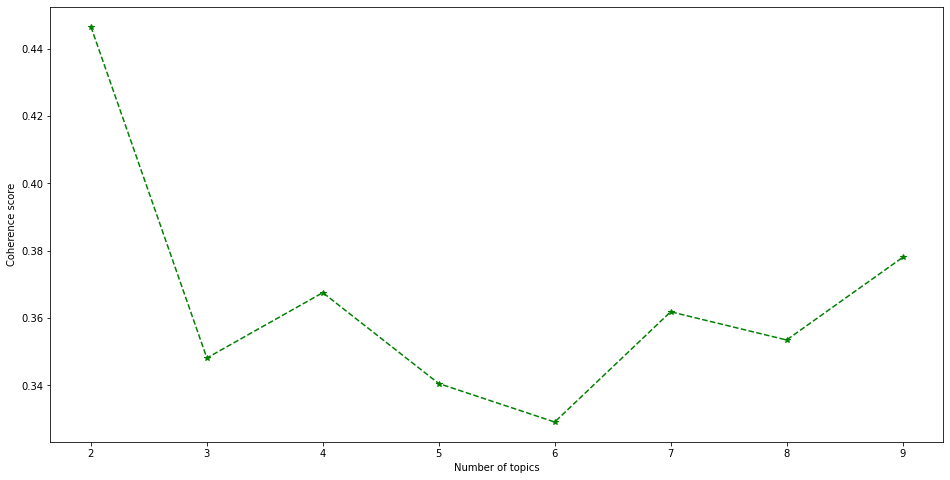

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (16,8))
plt.plot(topic_num,cv_score,color='green', marker='*', linestyle='dashed')
plt.xticks(range(2,10))
plt.xlabel('Number of topics')
plt.ylabel('Coherence score')
plt.show()

In [ ]:
# Creating LDA model with number of topics as 2
Lda2 = gensim.models.ldamodel.LdaModel
ldamodel2 = Lda2(corpus=corpus,id2word=id2word,num_topics=2,random_state=100,update_every=1,chunksize=100,passes=10,alpha="auto")
clear_output()

In [ ]:
print(CoherenceModel(model=ldamodel2,texts=df['cleaned_text1'],dictionary=id2word , coherence='c_v').get_coherence())

0.4465703019887205


In [ ]:
ldamodel2.print_topics()

[(0,
  '0.023*"death" + 0.020*"year" + 0.016*"more" + 0.014*"lead" + 0.014*"world" + 0.013*"people" + 0.011*"high" + 0.011*"second" + 0.009*"number" + 0.008*"reduce"'),
 (1,
  '0.132*"kill" + 0.099*"http" + 0.050*"co" + 0.047*"bit" + 0.043*"bit_ly" + 0.040*"die" + 0.036*"injure" + 0.027*"people" + 0.024*"road" + 0.017*"time"')]

In [ ]:
vis2 = gensim_models.prepare(ldamodel2, corpus, id2word, mds="mmds", R=30)
vis2

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.013679 -0.241399       1        1  68.825086
1      0.013679  0.241399       2        1  31.174914, topic_info=                   Term          Freq         Total Category  logprob  loglift
359                kill  15554.000000  15554.000000  Default  30.0000  30.0000
6521               http  12481.000000  12481.000000  Default  29.0000  29.0000
86                   co   5873.000000   5873.000000  Default  28.0000  28.0000
25                  die   4765.000000   4765.000000  Default  27.0000  27.0000
3294                bit   6689.000000   6689.000000  Default  26.0000  26.0000
...                 ...           ...           ...      ...      ...      ...
11               people   3210.579653   6501.140606   Topic2  -3.6020   0.4600
411              family    546.302031    627.880699   Topic2  -5.3731   1.0264
472              police    686.051215    992.036059   Topic2  -5.1453   0.7967
312               today    439.020130    699.717179   Topic2  -5.5917   0.6994
27307  use_twitter_curb    453.087020   2444.130422   Topic2  -5.5602  -0.5198

[117 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
102       1  0.999556   account
486       1  0.001487  at_least
486       2  0.997927  at_least
3294      1  0.174593       bit
3294      2  0.825432       bit
...     ...       ...       ...
207       1  0.999940     world
141       1  0.937550      year
141       2  0.062564      year
696       1  0.004118     youth
696       2  0.992340     youth

[146 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2])

In [ ]:
# Creating a lookup table for topics
topic_data = pd.DataFrame((ldamodel2.print_topics()),columns=['TopicNumber','TopKeywords'])
topic_data['TopicName'] = ['accident_event_data', 'information_data'] #enter selected topics names here
topic_data = topic_data[['TopicNumber','TopicName','TopKeywords']]
topic_data['TopKeywords'] = topic_data.TopKeywords.str.replace(r'[^a-z]',' ',regex=True).apply(lambda x: x.split())
topic_data.style.set_properties(subset=['TopKeywords'], **{'width': '300px'})

,TopicNumber,TopicName,TopKeywords
0,0,accident_event_data,"['death', 'year', 'more', 'lead', 'world', 'people', 'high', 'second', 'number', 'reduce']"
1,1,information_data,"['kill', 'http', 'co', 'bit', 'bit', 'ly', 'die', 'injure', 'people', 'road', 'time']"


In [ ]:
df.isnull().sum()

id                13
tweet             13
time              13
cleaned_text      13
cleaned_text1     13
labelFromVADER    13
TopicNumber       13
dtype: int64

In [ ]:
#Creating new columns and inserting topic numbers and names
for index,sent in enumerate(ldamodel2[corpus]):
  topic_num =[]
  topic_details = sorted(sent,key=lambda x: x[1], reverse=True)[:2] # Getting top 2 topics in descending order
  topic_num.append(topic_details[0][0]) # Appending top topic
  if len(topic_details) > 1:
    if topic_details[1][1] > 0.35: # Appending second topic only if it has more than 35% influence on current row
      topic_num.append(topic_details[1][0])
  df.loc[index,'TopicNumber'] = ','.join(str(x) for x in sorted(topic_num))

In [ ]:
df.dropna(inplace = True)

In [ ]:
for index,topic_num in enumerate(df.TopicNumber):
  topic_name_list=[]
  for single_topic_num in (topic_num).split(','):
    single_topic_num=int(single_topic_num)
    topic_name_list.append(topic_data.loc[topic_data.TopicNumber == single_topic_num,'TopicName'][single_topic_num]) 
  # Extracting topic names from lookup table
  df.loc[index,'TopicName'] =' & '.join(topic_name_list)

In [ ]:
df.head()

,id,tweet,time,cleaned_text,cleaned_text1,labelFromVADER,TopicNumber,TopicName
0,1480483510896902145,If you get to know about the statistics of roa...,Mon Jan 10 10:15:49 +0000 2022,get know statistic road accident minute will s...,"[get, know, statistic, road, accident, minute,...",neg,0,accident_event_data
1,1480500301941522433,That’s how a people’s leader acts.,Mon Jan 10 11:22:33 +0000 2022,s how people leader act,"[how, people, leader, act]",neg,0,accident_event_data
2,1480537770539978752,who has posed a direct/Indirect challenge to E...,Mon Jan 10 13:51:26 +0000 2022,pose direct indirect challenge eaam die air cr...,"[pose_direct_indirect_challenge, eaam, die, ai...",neg,0,accident_event_data
3,1480666410418331657,@Suhelseth No real life that we normally see i...,Mon Jan 10 22:22:36 +0000 2022,real life normally see road accident all doesn...,"[real, life, normally, see, road, accident, al...",neg,0,accident_event_data
4,1480384703232294913,"Namaskar,\nrequest u all 2 help us Mysuru resi...",Mon Jan 10 03:43:12 +0000 2022,request help mysuru resident inside city road ...,"[request, help, mysuru, resident, inside, city...",neg,0,accident_event_data


In [ ]:
df.dropna(inplace = True)

In [ ]:
range(df.shape[0])

range(0, 41061)

In [ ]:
df['label'] = df.TopicName.str.cat(df.labelFromVADER, sep='_')

In [ ]:
df['label'] = df['label'].str.replace('information_data_neg', 'accident_event_neg')
df['label'] = df['label'].str.replace('accident_event_data_neg', 'information_neg')

In [ ]:
df.label.unique()

array(['information_neg', 'accident_event_neg', 'accident_event_data_pos',
       'accident_event_data & accident_event_neg',
       'accident_event_data & information_data_pos',
       'information_data_pos'], dtype=object)

In [200]:
for i in df[df.label == 'accident_event_data & information_data_pos']['tweet'][:20]:
  print(i)
  print()

#Thanks_BSF for reaching in time and saving the precious lives of people when fire broke out at station road of #Barmer 
#BSF_The_FireFighters 
#Rajasthan #India  
#Accident  #NishaDahiya https://t.co/wPxrIbV3lo

Praises for #EveryDayHero #RPF Haridwar HC Manoj Bhandari. He helped 22 stranded injured pilgrims on road after an accident near #Haridwar when no passerby came for help. He assisted them coordinating with NHAI and other agencies.
@AshwiniVaishnaw @sanjay_chander @RailMinIndia https://t.co/qgOO2fA8qV

It will help reducing road accidents too. Good for road safety.
From the Times of India:  https://t.co/vv2ZPxrrpk

#BREAKING #BreakingNews 
@BSF_India rescued two siblings who got injured in a road accident in #WestBengal .
The #BSF Jawans took them to nearby hospital in the mean time and saved their lives.
Kudos to #BSF_Saviours . #JaiHind 
#WellDoneBSF
#BSFSavioursOfDemocracy https://t.co/Lw6rjEjGxe

Adequate awareness is definitely needed due to numerous road accidents in Indi

In [194]:
df.to_csv('Tweets_with_Labels.csv')